# Импортирую модули

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Строю нужные мне графики

Открываю полученную в UniProt табличку со всеми белками, в которых нашелся мой домен.

In [14]:
df = pd.read_csv('my_domain_uniprot.tsv', delimiter='\t').set_index('Entry')
df.rename(columns={'Protein names' : 'Protein name', 'Cross-reference (Pfam)' : 'Pfam AC', 'Taxonomic lineage (PHYLUM)' : 'Phylum', 'Taxonomic lineage (FAMILY)' : 'Family', 'Taxonomic lineage (GENUS)' : 'Genus'}, inplace=True)
df

Protein name  Length  \
Entry                                                                   
Q9F7P4            Green-light absorbing proteorhodopsin (GPR)     249   
Q9AFF7             Blue-light absorbing proteorhodopsin (BPR)     251   
A0A640VNP7  Protein-methionine-sulfoxide reductase heme-bi...     207   
Q7NP59                                        Gll0198 protein     298   
A0A2E0C1B0                           Biphenyl 2,3-dioxygenase     249   
...                                                       ...     ...   
A0A239CLR8                                  Bacteriorhodopsin     349   
A0A142HG79                            Uncharacterized protein     244   
A0A388PCC3                                Bacteriorhodopsin-I     256   
A0A419DSI5                                          Rhodopsin     252   
A0A1H8Y429                                  Bacteriorhodopsin     230   

                     Pfam AC  \
Entry                          
Q9F7P4              PF01036;   
Q9AFF7              PF01036;   
A0A640VNP7  PF01036;PF01794;   
Q7NP59              PF01036;   
A0A2E0C1B0          PF01036;   
...                      ...   
A0A239CLR8          PF01036;   
A0A142HG79          PF01036;   
A0A388PCC3          PF01036;   
A0A419DSI5          PF01036;   
A0A1H8Y429          PF01036;   

                                                     Organism  \
Entry                                                           
Q9F7P4                        Gamma-proteobacterium EBAC31A08   
Q9AFF7                         Gamma-proteobacterium Hot 75m4   
A0A640VNP7                              Roseobacter cerasinus   
Q7NP59      Gloeobacter violaceus (strain ATCC 29082 / PCC...   
A0A2E0C1B0                                          bacterium   
...                                                       ...   
A0A239CLR8                        Geodermatophilus saharensis   
A0A142HG79                        Hymenobacter sp. PAMC 26554   
A0A388PCC3                        Candidatus Planktophila sp.   
A0A419DSI5                         Exiguobacterium sp. RIT452   
A0A1H8Y429                          Pseudomonas sp. Snoq117.2   

                                 Family                    Genus  \
Entry                                                              
Q9F7P4                              NaN                      NaN   
Q9AFF7                              NaN                      NaN   
A0A640VNP7             Rhodobacteraceae              Roseobacter   
Q7NP59                 Gloeobacteraceae              Gloeobacter   
A0A2E0C1B0                          NaN                      NaN   
...                                 ...                      ...   
A0A239CLR8          Geodermatophilaceae         Geodermatophilus   
A0A142HG79            Hymenobacteraceae             Hymenobacter   
A0A388PCC3  Candidatus Nanopelagicaceae  Candidatus Planktophila   
A0A419DSI5                          NaN          Exiguobacterium   
A0A1H8Y429             Pseudomonadaceae              Pseudomonas   

                    Phylum  
Entry                       
Q9F7P4      Proteobacteria  
Q9AFF7      Proteobacteria  
A0A640VNP7  Proteobacteria  
Q7NP59       Cyanobacteria  
A0A2E0C1B0             NaN  
...                    ...  
A0A239CLR8  Actinobacteria  
A0A142HG79   Bacteroidetes  
A0A388PCC3  Actinobacteria  
A0A419DSI5      Firmicutes  
A0A1H8Y429  Proteobacteria  

[4725 rows x 7 columns]

Смотрю, какие еще доменные архитектуры присутствуют среди наших находок:

In [15]:
df.groupby(by='Pfam AC').size()

Pfam AC
PF01036;            4724
PF01036;PF01794;       1
dtype: int64

In [17]:
df[df['Pfam AC'] == 'PF01036;PF01794;'].index

Index(['A0A640VNP7'], dtype='object', name='Entry')

Выделим только те, которые содержат только необходимые мне домены:

In [37]:
df1 = df[df['Pfam AC'] == 'PF01036;']
df1['Length'].describe()

count    4724.000000
mean      193.413844
std        69.525779
min        48.000000
25%       111.000000
50%       229.000000
75%       251.000000
max       400.000000
Name: Length, dtype: float64

И построим гистограмму распределения длин белков:

In [6]:
sns.set_style('darkgrid')

In [5]:
plt.figure(figsize=(13,8))
sns.histplot(data=df1, x='Length', stat='count', binwidth=10, kde=True)
plt.ylabel('Count', size=15)
plt.xlabel('Protein length', size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.savefig('prot_len_hist.png')
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 936x576 with 0 Axes>

Cоставлю представительную выборку:

In [8]:
df2 = df1[(df1['Length'] >= 230) & (df1['Length'] <= 270)]
df2.groupby(by='Phylum').size().sort_values()

Phylum
Acidobacteria                  1
Candidatus Poribacteria        1
Chlamydiae                     1
Tenericutes                    1
Spirochaetes                   2
Armatimonadetes                2
Chlorobi                       2
Gemmatimonadetes               3
Balneolaeota                   4
Rhodothermaeota                9
Deinococcus-Thermus           10
Candidatus Marinimicrobia     16
Chloroflexi                   33
Planctomycetes                34
Verrucomicrobia               34
Firmicutes                    41
Cyanobacteria                 63
Actinobacteria               251
Bacteroidetes                487
Proteobacteria               684
dtype: int64

In [10]:
df3 = df2[df2['Phylum'].isin(['Proteobacteria', 'Bacteroidetes', 'Actinobacteria', 'Cyanobacteria', 'Firmicutes', 'Verrucomicrobia', 'Planctomycetes', 'Chloroflexi'])]
df3

Protein name  Length   Pfam AC  \
Entry                                                                       
Q9F7P4      Green-light absorbing proteorhodopsin (GPR)     249  PF01036;   
Q9AFF7       Blue-light absorbing proteorhodopsin (BPR)     251  PF01036;   
A0A126ZI97                     Biphenyl 2,3-dioxygenase     256  PF01036;   
A0A0R2TGC9                     Biphenyl 2,3-dioxygenase     261  PF01036;   
A0A254Q1M6                     Biphenyl 2,3-dioxygenase     264  PF01036;   
...                                                 ...     ...       ...   
A0A5N5Z992                                    Rhodopsin     243  PF01036;   
A0A142HG79                      Uncharacterized protein     244  PF01036;   
A0A388PCC3                          Bacteriorhodopsin-I     256  PF01036;   
A0A419DSI5                                    Rhodopsin     252  PF01036;   
A0A1H8Y429                            Bacteriorhodopsin     230  PF01036;   

                                         Organism  \
Entry                                               
Q9F7P4            Gamma-proteobacterium EBAC31A08   
Q9AFF7             Gamma-proteobacterium Hot 75m4   
A0A126ZI97              Variovorax sp. PAMC 28711   
A0A0R2TGC9  OM182 bacterium BACL3 MAG-120619-bin3   
A0A254Q1M6          Polynucleobacter aenigmaticus   
...                                           ...   
A0A5N5Z992                Kordia sp. TARA_039_SRF   
A0A142HG79            Hymenobacter sp. PAMC 26554   
A0A388PCC3            Candidatus Planktophila sp.   
A0A419DSI5             Exiguobacterium sp. RIT452   
A0A1H8Y429              Pseudomonas sp. Snoq117.2   

                                 Family                    Genus  \
Entry                                                              
Q9F7P4                              NaN                      NaN   
Q9AFF7                              NaN                      NaN   
A0A126ZI97               Comamonadaceae               Variovorax   
A0A0R2TGC9                          NaN                      NaN   
A0A254Q1M6             Burkholderiaceae         Polynucleobacter   
...                                 ...                      ...   
A0A5N5Z992            Flavobacteriaceae                   Kordia   
A0A142HG79            Hymenobacteraceae             Hymenobacter   
A0A388PCC3  Candidatus Nanopelagicaceae  Candidatus Planktophila   
A0A419DSI5                          NaN          Exiguobacterium   
A0A1H8Y429             Pseudomonadaceae              Pseudomonas   

                    Phylum  
Entry                       
Q9F7P4      Proteobacteria  
Q9AFF7      Proteobacteria  
A0A126ZI97  Proteobacteria  
A0A0R2TGC9  Proteobacteria  
A0A254Q1M6  Proteobacteria  
...                    ...  
A0A5N5Z992   Bacteroidetes  
A0A142HG79   Bacteroidetes  
A0A388PCC3  Actinobacteria  
A0A419DSI5      Firmicutes  
A0A1H8Y429  Proteobacteria  

[1627 rows x 7 columns]

In [16]:
my_sample = df3.sample(n=60, axis=0)
my_sample.groupby(by='Phylum').size()

Phylum
Actinobacteria     11
Bacteroidetes      17
Chloroflexi         2
Cyanobacteria       1
Firmicutes          2
Planctomycetes      1
Proteobacteria     25
Verrucomicrobia     1
dtype: int64

Скачаем полученную выборку белков:

In [17]:
from urllib.request import urlopen
with open('sample.fasta', 'w') as outfile:
    for ac in my_sample.index.to_list():
        outfile.write(urlopen(f'https://www.uniprot.org/uniprot/{ac}.fasta').read().decode())

In [53]:
hmm = pd.read_csv('hmm_search_result.csv')
hmm['Sequence'] = [elem.split('|')[1] for elem in hmm['Sequence']]
hmm

Sequence  score
0     A0A6M9PKU4  481.5
1         A4GJX6  479.9
2         V4YT71  478.9
3     A0A2E1FV43  477.9
4     A0A424RMR2  477.9
...          ...    ...
4665      S6CYB3 -113.4
4666      S6D6W6 -113.7
4667  A0A088FUS2 -113.7
4668  A0A088FTR1 -114.3
4669      S6CS03 -115.0

[4670 rows x 2 columns]

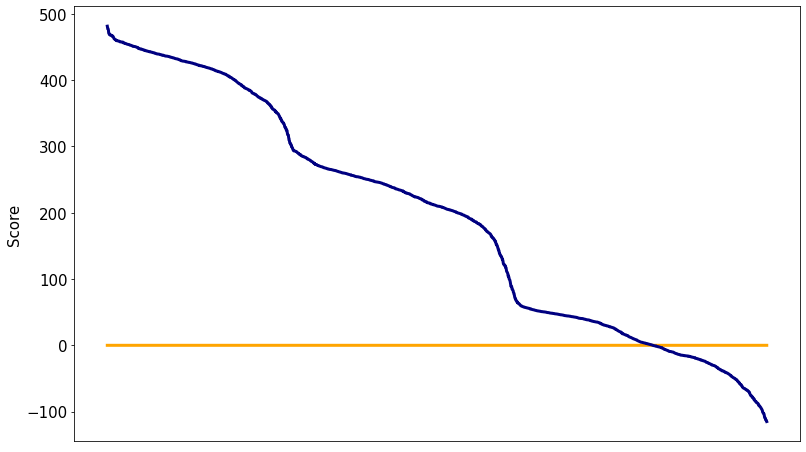

In [44]:
plt.figure(figsize=(13,8))
plt.plot(np.zeros(len(hmm['score'].to_list())), lw=3, color='orange')
plt.plot(hmm['score'].to_list(), lw=3, color='navy')
plt.ylabel('Score', size=15)
plt.yticks(size=15)
plt.xticks([])
plt.savefig('score_graph.png')
plt.show()

In [56]:
hmm['True'] = hmm['Sequence'].isin(df1.index.to_list())
hmm.groupby(by='True').size()

True
True    4670
dtype: int64

In [47]:
TP = []
TN = []
FP = []
FN = []
for index, row in hmm.iterrows():
    TP.append((hmm[hmm['True'] == True]['score'] > row['score']).sum())
    TN.append((hmm[hmm['True'] == False]['score'] < row['score']).sum())
    FP.append((hmm[hmm['True'] == False]['score'] > row['score']).sum())
    FN.append((hmm[hmm['True'] == True]['score'] < row['score']).sum())
hmm['TP'] = TP
hmm['TN'] = TN
hmm['FP'] = FP
hmm['FN'] = FN
hmm

Sequence  score  True    TP  TN  FP    FN
0     A0A6M9PKU4  481.5  True     0   0   0  4669
1         A4GJX6  479.9  True     1   0   0  4668
2         V4YT71  478.9  True     2   0   0  4667
3     A0A2E1FV43  477.9  True     3   0   0  4664
4     A0A424RMR2  477.9  True     3   0   0  4664
...          ...    ...   ...   ...  ..  ..   ...
4665      S6CYB3 -113.4  True  4665   0   0     4
4666      S6D6W6 -113.7  True  4666   0   0     2
4667  A0A088FUS2 -113.7  True  4666   0   0     2
4668  A0A088FTR1 -114.3  True  4668   0   0     1
4669      S6CS03 -115.0  True  4669   0   0     0

[4670 rows x 7 columns]

In [50]:
hmm['TPR'] = hmm['TP'] / (hmm['TP'] + hmm['FN'])
hmm['1 - SPC'] = [1 for _ in range(hmm.shape[0])]
hmm

Sequence  score  True    TP  TN  FP    FN       TPR  1 - SPC
0     A0A6M9PKU4  481.5  True     0   0   0  4669  0.000000        1
1         A4GJX6  479.9  True     1   0   0  4668  0.000214        1
2         V4YT71  478.9  True     2   0   0  4667  0.000428        1
3     A0A2E1FV43  477.9  True     3   0   0  4664  0.000643        1
4     A0A424RMR2  477.9  True     3   0   0  4664  0.000643        1
...          ...    ...   ...   ...  ..  ..   ...       ...      ...
4665      S6CYB3 -113.4  True  4665   0   0     4  0.999143        1
4666      S6D6W6 -113.7  True  4666   0   0     2  0.999572        1
4667  A0A088FUS2 -113.7  True  4666   0   0     2  0.999572        1
4668  A0A088FTR1 -114.3  True  4668   0   0     1  0.999786        1
4669      S6CS03 -115.0  True  4669   0   0     0  1.000000        1

[4670 rows x 9 columns]

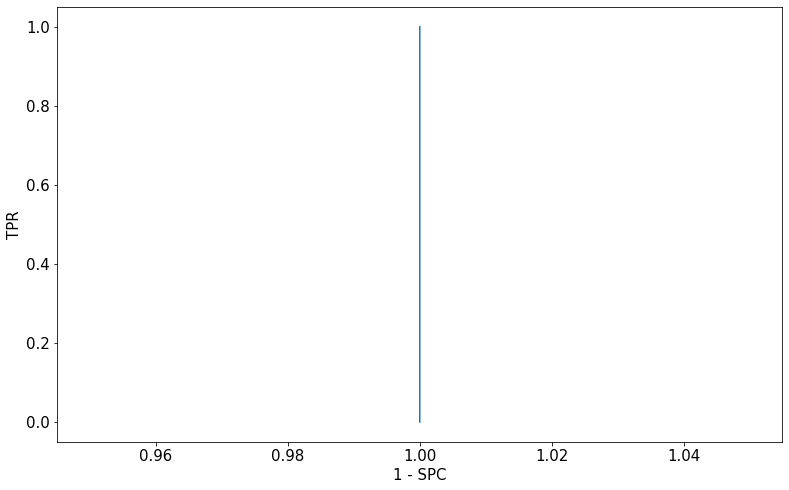

In [51]:
plt.figure(figsize=(13,8))
plt.plot(hmm['1 - SPC'], hmm['TPR'])
plt.ylabel('TPR', size=15)
plt.xlabel('1 - SPC', size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.savefig('roc-curve.png')
plt.show()